# Product Force - The Variant Bunch
February 22nd 2019

Lets read in a ClinVar download, plot some histograms.

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import json

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Extract genes column.   Some show multiple genes/locations - e.g. "CFTR|LOC11167447".  For now, just take the fires

def extract_first_genes(df_):
    """ Return a list of genes, extracting only one (the first one) per row """
    nrows, ncolumns = df_.shape
    all_genes = df_['Gene(s)']
    single_genes = [g.split('|')[0] for g in all_genes]
    assert len(single_genes) == nrows
    return single_genes

def test_extract_first_genes():
    data = {'Gene(s)': ['GRN|LOC1234', 'CFTR'],
            'Review Status':['None', 'None']}
    df = pd.DataFrame(data)
    genes = extract_first_genes(df)
    print(genes)
    assert len(genes) == 2
    print("test_extract_first_genes: passed.")
    
test_extract_first_genes()

['GRN', 'CFTR']
test_extract_first_genes: passed.


In [4]:
def extract_significance(df_):
    """ Returns a list of significance strings, one for each row """
    nrows, ncolumns = df_.shape
    sigs = df_['Clinical significance (Last reviewed)']
    cleaned_sigs = [s.split('(')[0] for s in sigs]
    return cleaned_sigs

def test_extract_significance():
    data = {'Gene(s)': ['GRN|LOC1234', 'CFTR', 'CTFR'],
            'Clinical significance (Last reviewed)':
                ['Pathogenic(12 May 2010)', 'Pathogenic(21 June 2015)', 'Benign']}
    df = pd.DataFrame(data)
    sigs = extract_significance(df)
    assert len(sigs) == 3
    assert len(set(sigs)) == 2
    print(sigs)
    print("test_extract_significance: passed.")
    
test_extract_significance()
    

['Pathogenic', 'Pathogenic', 'Benign']
test_extract_significance: passed.


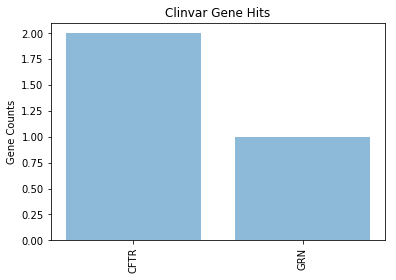

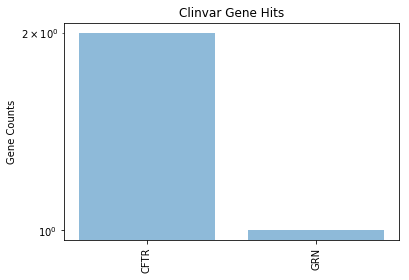

test_plot_gene_histogram: passed.


In [5]:
def plot_gene_histogram(genes, logorlinear='linear'):
    """ Given a list of gene names, plot a histogram of gene counts"""
    assert logorlinear in ('log', 'linear')
    gene_counts = Counter(genes)
    gene_names = gene_counts.keys()
    counts = gene_counts.values()
    bar_pos = np.arange(len(gene_names))

    plt.bar(gene_names, counts, align='center', alpha=0.5)
    plt.xticks(bar_pos, gene_names)
    plt.ylabel('Gene Counts')
    plt.xticks(rotation='vertical')
    plt.yscale(logorlinear)
    plt.title('Clinvar Gene Hits')
    plt.show()
    
def test_plot_gene_histogram():
    test_genes = ["GRN", "CFTR", "CFTR"]
    plot_gene_histogram(test_genes)
    plot_gene_histogram(test_genes, 'log')
    print("test_plot_gene_histogram: passed.")
    
test_plot_gene_histogram()

[[0 1 1 1]
 [1 1 0 0]
 [0 1 0 0]]


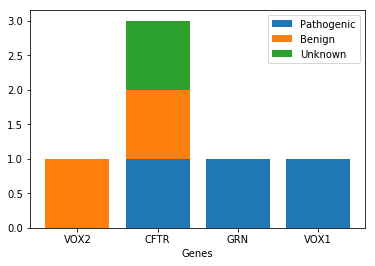

In [6]:
def plot_gene_with_significance_histogram(genes, sigs, logorlinear='linear'):
    """ Given a list of gene names and parallel list of significances, plot a histogram of gene counts
    stacked by significance"""
    assert logorlinear in ('log', 'linear')
    
    gene_sig_counts_zip = Counter(zip(genes, sigs))
    
    gene_set = set(genes)
    sig_set = set(sigs)
    
    # We want a 2D array [sig_ix, gene_ix] of counts
    sig_gene_counts = np.zeros((len(sig_set), len(gene_set)), dtype=int)
    for gix, g in enumerate(gene_set):
        for six, s in enumerate(sig_set):
            sig_gene_counts[six, gix] = gene_sig_counts_zip[(g,s)]
    
    print(sig_gene_counts)
    
    gpos = np.arange(len(gene_set))
    for six,s in enumerate(sig_set):
        plt.bar(gpos, sig_gene_counts[six],
            bottom = np.sum(sig_gene_counts[:six], axis = 0),
            label=s)
    plt.xticks(range(len(gene_set)), list(gene_set))
    plt.xlabel("Genes")
    plt.yscale(logorlinear)
    plt.legend(loc="best")
            
    plt.show()
    
            
def test_plot_gene_with_significance_histogram():
    test_genes = ["GRN", "CFTR", "CFTR", "CFTR", "VOX1", "VOX2"]
    test_sigs = ["Pathogenic", "Pathogenic", "Benign", "Unknown", "Pathogenic", "Benign"]
    plot_gene_with_significance_histogram(test_genes, test_sigs)
    
test_plot_gene_with_significance_histogram()

In [7]:
def thing_hist_as_json(thing_list):
    """ Return a count histogram in a json format suitable for passing to Alison's front end.  Thing list is e.g.
    a list of names """
    counts = Counter(thing_list)
    jslist = [{'name':key, 'value':counts[key]} for key in counts.keys()]
    return json.dumps(jslist, indent=4, sort_keys=True)
    
def test_thing_hist_as_json():
    test_genes = ["GRN", "CFTR", "CFTR"]
    json = thing_hist_as_json(test_genes)
    print(json)
    print("test_thing_hist_as_json: passed.")
    
test_thing_hist_as_json()   

[
    {
        "name": "CFTR",
        "value": 2
    },
    {
        "name": "GRN",
        "value": 1
    }
]
test_thing_hist_as_json: passed.


Loading clinvar spreadsheet...
                                                  Name Gene(s)  \
count                                             1894    1894   
unique                                            1894      32   
top     NM_002087.3(GRN):c.93_96dupCCTG (p.Asp33Profs)    CFTR   
freq                                                 1    1352   
mean                                               NaN     NaN   
std                                                NaN     NaN   
min                                                NaN     NaN   
25%                                                NaN     NaN   
50%                                                NaN     NaN   
75%                                                NaN     NaN   
max                                                NaN     NaN   

           Condition(s) Clinical significance (Last reviewed)  \
count              1894                                  1894   
unique               78                       

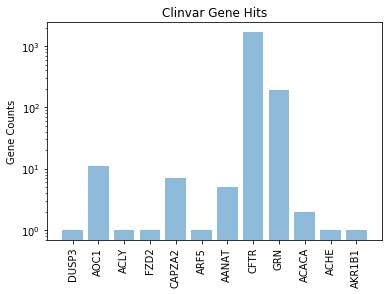

[[  0   0   0   0   0   0   0  54  11   0   0   0]
 [  0   0   0   0   0   0   0  19  12   0   0   0]
 [  0   0   0   0   2   0   0 564  46   0   0   0]
 [  0   0   0   0   0   0   0 311  55   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   2   0   0   0   0]
 [  0   0   0   0   1   0   0 145   8   0   0   0]
 [  0   0   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0   0   6   0   0   0   0]
 [  0   0   0   0   0   0   0  15   0   0   0   0]
 [  1  11   1   1   4   1   5 417  46   2   1   1]
 [  0   0   0   0   0   0   0  16   1   0   0   0]
 [  0   0   0   0   0   0   0  15   8   0   0   0]
 [  0   0   0   0   0   0   0  98   3   0   0   0]]


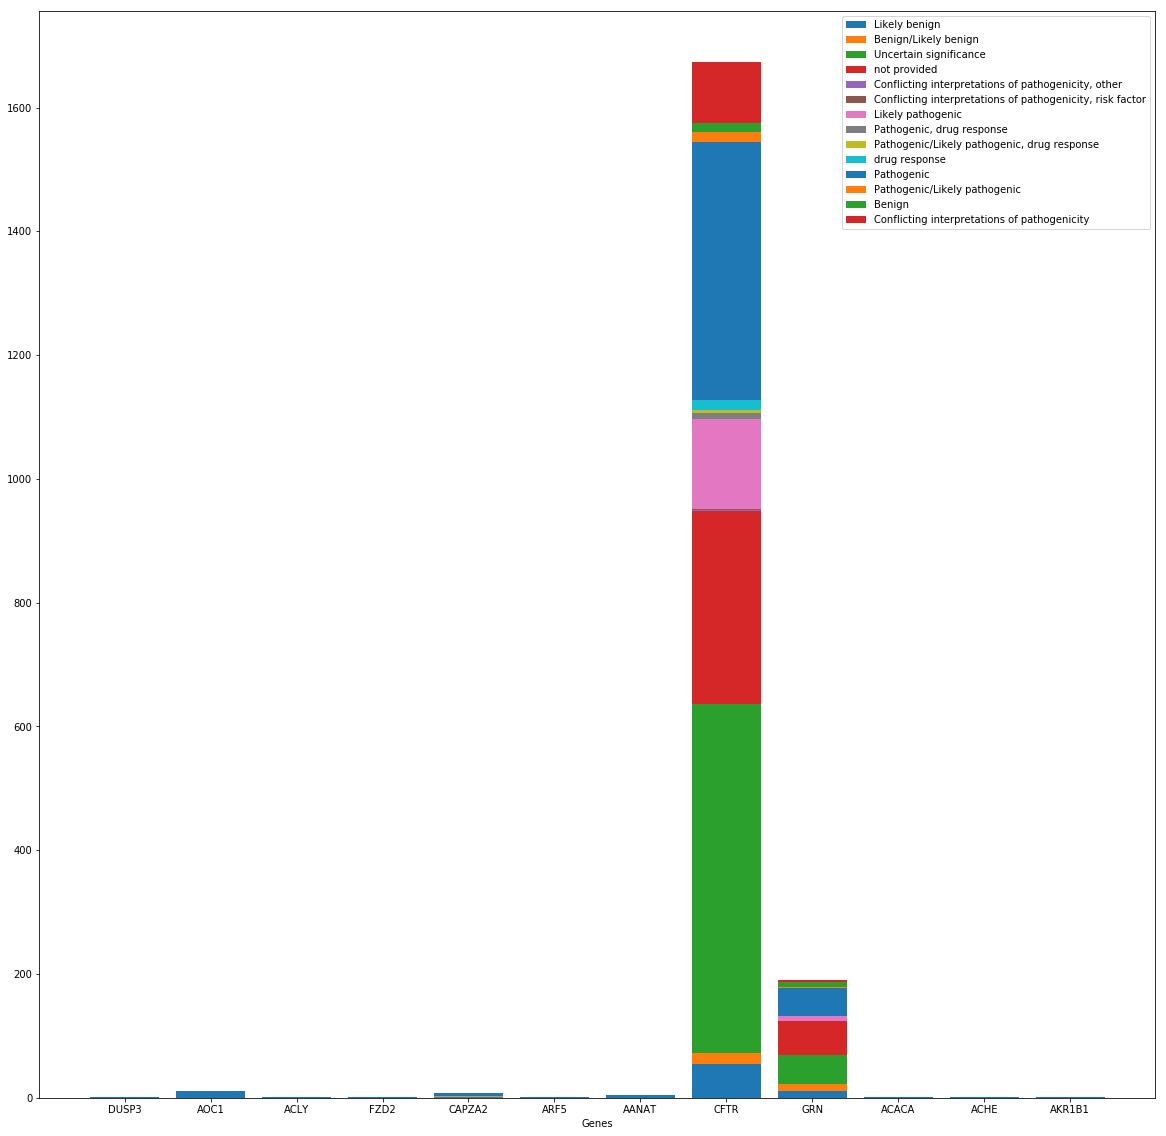

[
    {
        "name": "DUSP3",
        "value": 1
    },
    {
        "name": "AOC1",
        "value": 11
    },
    {
        "name": "ACLY",
        "value": 1
    },
    {
        "name": "FZD2",
        "value": 1
    },
    {
        "name": "CAPZA2",
        "value": 7
    },
    {
        "name": "ARF5",
        "value": 1
    },
    {
        "name": "AANAT",
        "value": 5
    },
    {
        "name": "CFTR",
        "value": 1673
    },
    {
        "name": "GRN",
        "value": 190
    },
    {
        "name": "ACACA",
        "value": 2
    },
    {
        "name": "ACHE",
        "value": 1
    },
    {
        "name": "AKR1B1",
        "value": 1
    }
]


In [8]:
def main():
    print("Loading clinvar spreadsheet...")
    download_fname = 'clinvar_GRN_OR_CFTR.txt'
    df = pd.read_csv(download_fname, sep='\t')
    print(df.describe(include='all'))
    
    genes = extract_first_genes(df)
    sigs = extract_significance(df)
    
    plot_gene_histogram(genes, 'log')
    
    plt.figure(figsize=(20,20))
    plot_gene_with_significance_histogram(genes, sigs, 'linear')
    
    json = thing_hist_as_json(genes)
    print(json)
    jsonfile = open("histogram_GRN_OR_CFTR.json", 'w')
    jsonfile.write(json)
    jsonfile.close()

main()